<a href="https://colab.research.google.com/github/Dhananjaypre28/machine-Learning-projects/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

 Read dataset

I'll read the dataset and get information about it.

In [ ]:
dataset = pd.read_csv("/content/dataset.csv")
dataset.head(20)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


Let's first split the dataset into train and test datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4189 non-null   object 
 10  Power              4189 non-null   object 
 11  Seats              4185 non-null   float64
 12  New_Price          580 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 460.8+ KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

In [ ]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Name

Let's explore the various cars in the dataset.

In [ ]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: Name, Length: 1592, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [ ]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [ ]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

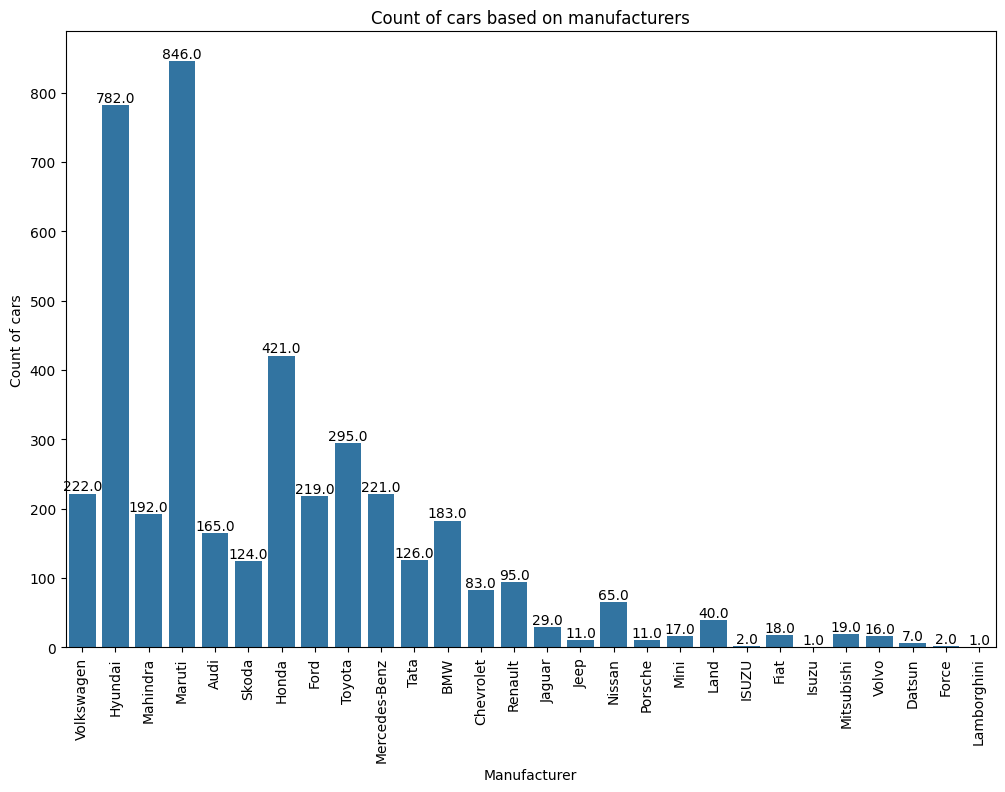

In [ ]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

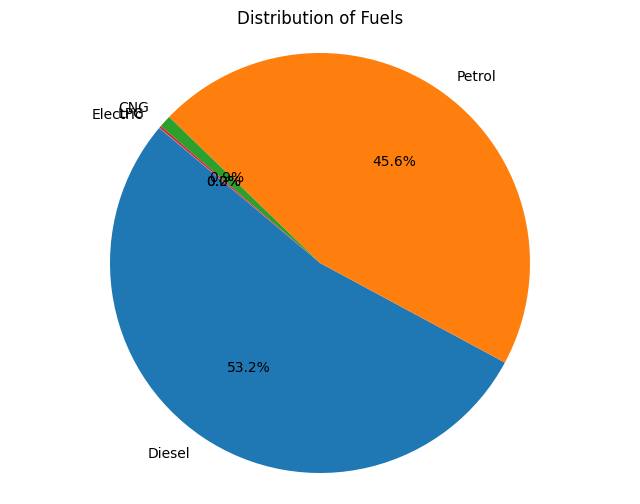

In [ ]:

fuel_counts = dataset['Fuel_Type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fuels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Maximum numbers of cars where using Diesel

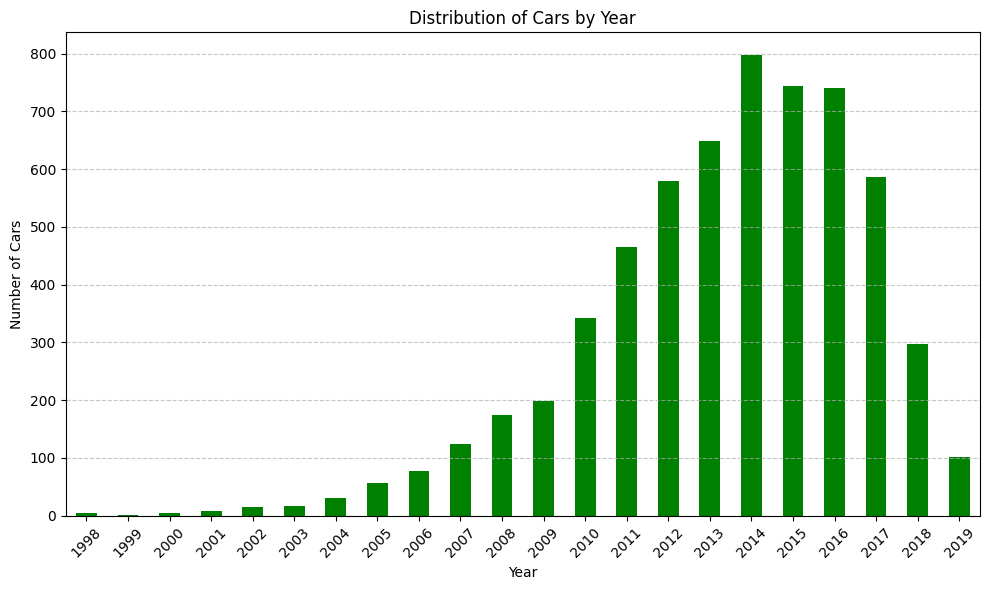

In [ ]:

year_counts = dataset['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='green')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [ ]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [ ]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Fuel_Type, Transmission,  and Owner_Type

All these columns are categorical columns which should be converted to dummy variables before being used.

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [ ]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [ ]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

Let's check for missing values.

In [ ]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


There is one missing value in each. I'll replace the missing value with the mean value of the column based on the training data.

In [ ]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [ ]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [ ]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### New Price

As most of the values are missing, I'll drop this column altogether.

In [ ]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [ ]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [ ]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [ ]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [ ]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [ ]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7008908549416727

The **Linear Regression** model performed the best with a R2 score of **0.70**


In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8870000450906768

The **Random Forest** model performed the best with a R2 score of **0.88**.